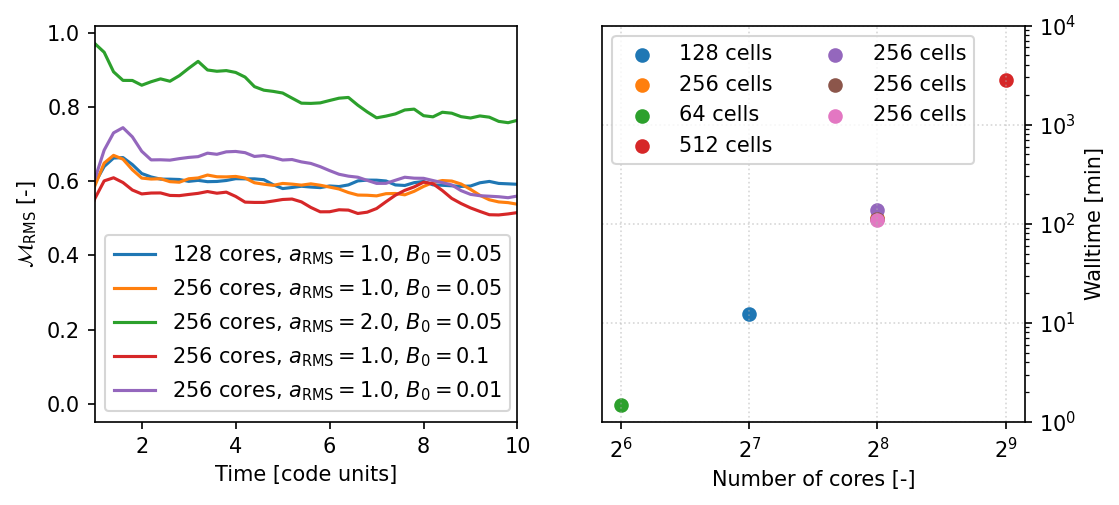

In [18]:
import os
import numpy as np
import matplotlib.pyplot as plt
from src.model import LoadAthenaPKRun

output_path = "outputs"

# Use os.listdir to get a list of all files and folders in the directory
fig, ax = plt.subplots(1, 2, dpi=150, figsize=(8, 3.5))
runs = os.listdir(output_path)

# Now, 'folders' contains a list of subdirectories in the specified directory
for i, run in enumerate(runs):
    try:
        i_sim = LoadAthenaPKRun(os.path.join(output_path, run))
        n_cell = i_sim.number_of_cells
        accel_rms = i_sim.acceleration_field_rms
        B_initial = i_sim.initial_magnetic_field

        # Average RMS Mach number in time
        try:
            i_run_data = np.genfromtxt(os.path.join(output_path, run, "average_mach_number_in_time.txt"))
            ax[0].plot(i_run_data[:, 0], i_run_data[:, 1], label=fr'{n_cell} cores, $a_{{\rm RMS}}=${accel_rms}, $B_{0}=${B_initial}')
        except FileNotFoundError:
            pass

        # Total walltime for each run
        if i_sim.equation_of_state == "Adiabatic":
            try:
                ax[1].scatter(n_cell, i_sim.walltime / 60, label=f"{n_cell} cells")
            except Exception as e:
                raise Warning(f'Error loading snapshot {run} data: {str(e)}')

    except AttributeError:
        pass

ax[0].set_xlabel(r'Time [code units]')
ax[0].set_ylabel(r'$\mathcal{M}_{\rm RMS}$ [-]')
ax[0].set_xlim(1e0, 1e1)
ax[0].legend()

ax[1].grid(True, alpha=0.5, linestyle=":")
ax[1].set_xlabel(r'Number of cores [-]')
ax[1].set_ylabel(r'Walltime [min]')
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_xscale('log', base=2)
ax[1].set_yscale('log')
ax[1].set_ylim(1e0, 1e4)
ax[1].legend(ncol=2)

In [ ]:
import os
from src.model import LoadAthenaPKRun

# Usage example
run = 'Turb_nGPUs1_ncells256_accelrms1.0_B0.05_Adiab'
sim = LoadAthenaPKRun(os.path.join('outputs', run))
sim.snapshot_list

p = sim.plot_snapshot_field_slice(49, ('gas', 'mach_number'), cmap='magma')
p.annotate_quiver(
    ('gas', 'velocity_x'),
    ('gas', 'velocity_y'),
    color='green',
    factor=16
)